### 파이토치 써보기: 회귀 1
딥러닝 회귀 모델에 파이토치 써 보기 - https://github.com/MyungKyuYi/AI-class/blob/main/abalone_regression.ipynb 참고

회귀 2와 모델 정의, 학습 방법이 다름 - __init__에서 각 층을 만들고, forward에서 활성화 함수 추가+층 삽입

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

#### 데이터 다루기

In [4]:
# 데이터 생성

df = pd.read_csv('../diabetes.csv')  # CSV 파일 경로

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# 입력과 타겟 분리
X = df.drop(['Outcome', 'BMI'], axis=1).values
y = df['BMI'].values.astype(np.float32)

# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614,), (154,))

In [6]:
# PyTorch tensors 형태로 바꿈
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
    # TensorDataset: 여러 개의 텐서를 묶어 한 쌍으로 만듦. 여기선 X_train[i], y_train[i]를 합쳐 한 쌍으로 만들어 줌.
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    # DataLoader: 데이터셋을 batch_size만큼 묶은 뒤, 특히 for문 등에서 한 묶음씩 꺼내주는 역할을 하는 객체.

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([614, 7]),
 torch.Size([154, 7]),
 torch.Size([614, 1]),
 torch.Size([154, 1]))

#### 모델 정의, 학습: 1번째 방법
__init__에서 각 층을 만들고, forward에서 활성화 함수 추가+층 삽입

In [7]:
# 회귀 모델 정의 1
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(7, 64) # X의 특징 개수가 7개
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 회귀는 분류 클래스를 1개로 둬야 함
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 생성
model = RegressionModel()

# 손실 함수, 최적화 기법 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 모델 1 학습

# Variables to store loss and accuracy
train_losses = []

# Training loop
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_dataloader):.4f}")

print("Training complete.")

Epoch 1/50, Loss: 1060.8982
Epoch 2/50, Loss: 1011.8898
Epoch 3/50, Loss: 923.6773
Epoch 4/50, Loss: 782.2155
Epoch 5/50, Loss: 593.3796
Epoch 6/50, Loss: 380.2654
Epoch 7/50, Loss: 211.0486
Epoch 8/50, Loss: 117.5826
Epoch 9/50, Loss: 92.1696
Epoch 10/50, Loss: 83.2456
Epoch 11/50, Loss: 89.4924
Epoch 12/50, Loss: 76.2427
Epoch 13/50, Loss: 72.8405
Epoch 14/50, Loss: 69.0291
Epoch 15/50, Loss: 68.2058
Epoch 16/50, Loss: 65.4432
Epoch 17/50, Loss: 63.1161
Epoch 18/50, Loss: 62.1543
Epoch 19/50, Loss: 63.7225
Epoch 20/50, Loss: 59.7863
Epoch 21/50, Loss: 58.9880
Epoch 22/50, Loss: 58.7542
Epoch 23/50, Loss: 56.1118
Epoch 24/50, Loss: 56.3149
Epoch 25/50, Loss: 54.0235
Epoch 26/50, Loss: 51.8469
Epoch 27/50, Loss: 58.3501
Epoch 28/50, Loss: 58.0414
Epoch 29/50, Loss: 49.3332
Epoch 30/50, Loss: 48.9419
Epoch 31/50, Loss: 47.7096
Epoch 32/50, Loss: 49.4668
Epoch 33/50, Loss: 46.5577
Epoch 34/50, Loss: 47.3015
Epoch 35/50, Loss: 46.0234
Epoch 36/50, Loss: 46.8332
Epoch 37/50, Loss: 49.1559


#### 모델 평가

In [9]:
# 평가
model.eval()
preds, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
print(f"Test MSE: {mse:.4f}")

Test MSE: 65.0188


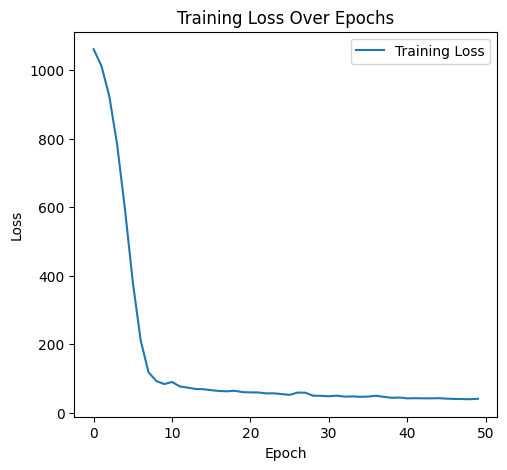

In [10]:
# Plot the loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()